# Sample Machine Learning Final Exam

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Generate 200 2D points from each of 2 Guassians with distributions shaped roughly as shown in the diagram below, with class 1 as the 'X's and class 2 as the 'O's. Plot the resulting 400 points with different colors for each Gaussian.

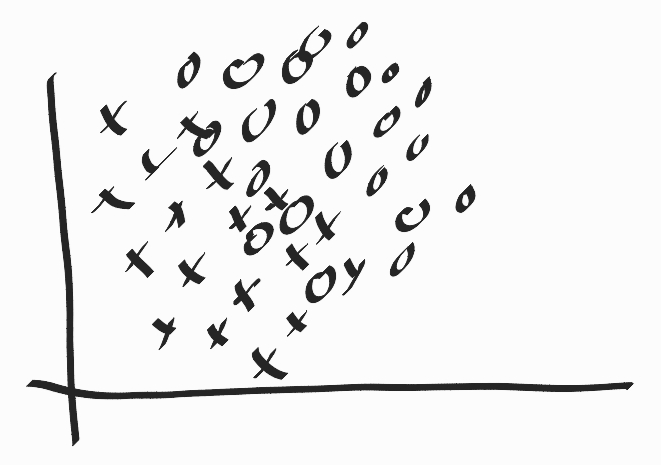

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
import time
import cvxopt

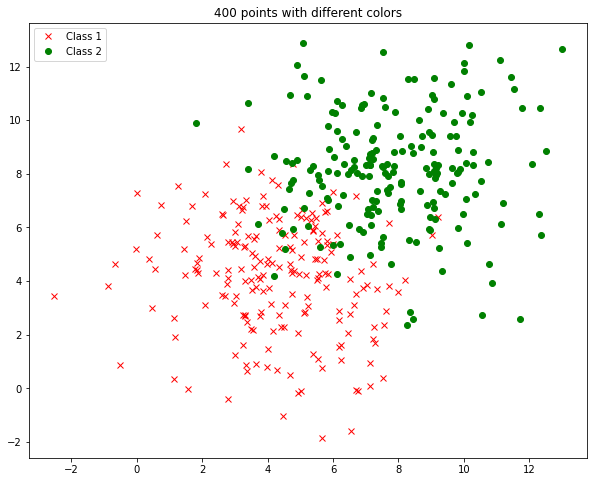

In [2]:
# Generate data
mu1 = np.array([4,4])
mu2 = np.array([8,8])
sigma = np.array([[4,0],[0,4]])

X1 =  np.random.multivariate_normal(mu1, sigma, 200)
X2 =  np.random.multivariate_normal(mu2, sigma, 200)

plt.figure(figsize = (10,8))
plt.plot(X1[:,0],X1[:,1],'rx',label='Class 1')
plt.plot(X2[:,0],X2[:,1],'go',label='Class 2')
plt.title('400 points with different colors')
plt.legend()
plt.show()

## Question 2 (20 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

In [3]:
X = np.concatenate((np.ones((X1.shape[0]+X2.shape[0],1)),np.concatenate((X1,X2),0)),1)
y = np.concatenate((np.zeros((X1.shape[0],1)),np.ones((X2.shape[0],1))),0)

In [4]:
# Split the dataset
def train_val_split(X,y,train_size):
    m = X.shape[0]
    order = np.arange(m)
    np.random.shuffle(order)
    train_len = int(m*train_size)
    train_in = order[:train_len]
    val_in = order[train_len:]
    X_train = X[train_in,:]
    y_train = y[train_in,:]
    X_val = X[val_in,:]
    y_val = y[val_in,:]
    return X_train,y_train,X_val,y_val
X_train,y_train,X_val,y_val = train_val_split(X,y,0.8)

In [5]:
# Logistic regression model

def sigmoid(z):
    return 1.0/(1 + np.exp(z))

def crossentropy(X,y,theta,alpha):
    yhat = sigmoid(-X @ theta)
    cost = - (y * np.log(yhat) + (1- y ) * np.log(1-yhat)).mean()
    grad_cost = X.T @ (yhat - y)
    return cost, grad_cost

def logistic_fit(X,y,epochs,alpha):
    theta = np.zeros((3,1))
    costs = []
    for epoch in tqdm(range(epochs),desc='Progress bar'):
        cost,grad_cost = crossentropy(X,y,theta,alpha)
        costs.append(cost)
        theta = theta - alpha*grad_cost
    return costs, theta

def predict(X,theta):
    yhat = sigmoid(-X @ theta)
    preds = np.where(yhat>=0.5,1,0)
    return preds

def accuracy(X,y,theta):
    yhat = sigmoid(-X @ theta)
    preds = np.where(yhat>=0.5,1,0)
    acc = (preds == y).sum()/y.shape[0]
    return acc*100

In [6]:
# Fit a logistic regression model to the data in the training set
costs, theta = logistic_fit(X_train,y_train,epochs=1000,alpha=0.001)

Progress bar:   0%|          | 0/1000 [00:00<?, ?it/s]

In [7]:
# The training set accuracy and validation set accuracy of the model
train_acc = accuracy(X_train,y_train,theta)
val_acc = accuracy(X_val,y_val,theta)
print('Training set accuracy',train_acc)
print('Validation set accuracy',val_acc)

Training set accuracy 92.1875
Validation set accuracy 92.5


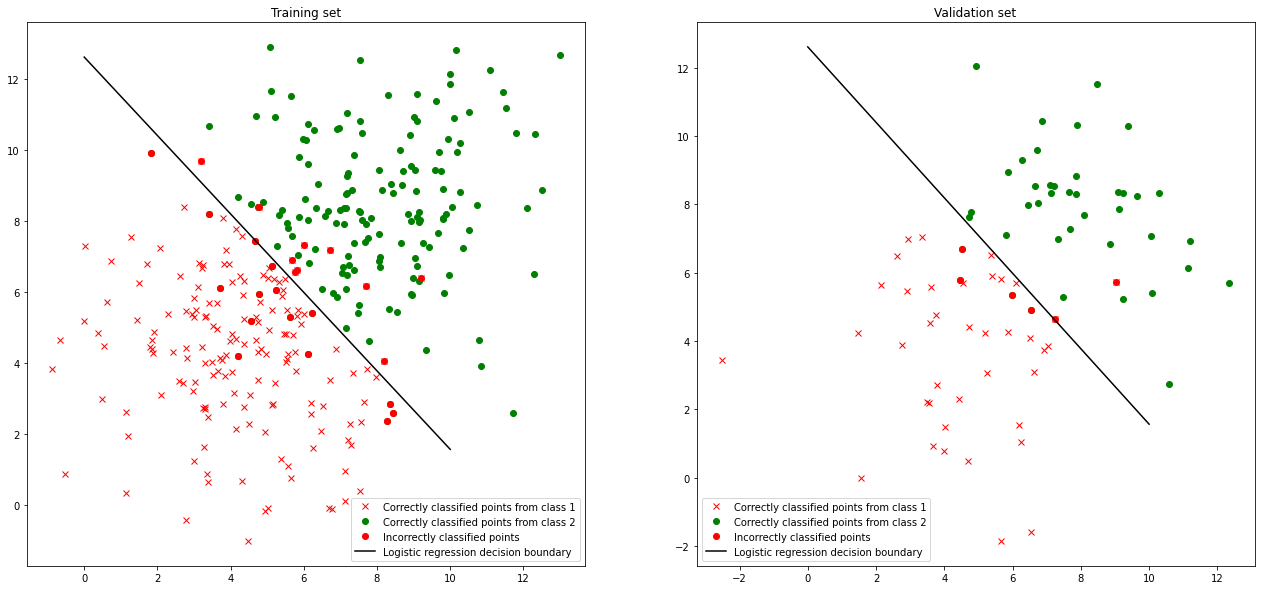

In [8]:
# Plot the result
matplotlib.rcParams['figure.figsize'] = [22,10]
fig,(ax1,ax2) = plt.subplots(1,2)

# Training set
ax1.set_title('Training set')
preds = predict(X_train,theta)
ax1.plot(X_train[y_train.reshape(-1)==0,1],X_train[y_train.reshape(-1)==0,2],'rx',label='Correctly classified points from class 1')
ax1.plot(X_train[y_train.reshape(-1)==1,1],X_train[y_train.reshape(-1)==1,2],'go',label='Correctly classified points from class 2')
ax1.plot(X_train[preds.reshape(-1) != y_train.reshape(-1),1],X_train[preds.reshape(-1) != y_train.reshape(-1),2],'ro',label='Incorrectly classified points')
x11 = 0
x12 = 10
x21 = (- theta[1,0] * x11 - theta[0,0]) / theta[2,0]
x22 = (- theta[1,0] * x12 - theta[0,0]) / theta[2,0]
ax1.plot((x11, x12),(x21, x22),'k-',label='Logistic regression decision boundary')
ax1.legend()

# Training set
ax2.set_title('Validation set')
preds = predict(X_val,theta)
ax2.plot(X_val[y_val.reshape(-1)==0,1],X_val[y_val.reshape(-1)==0,2],'rx',label='Correctly classified points from class 1')
ax2.plot(X_val[y_val.reshape(-1)==1,1],X_val[y_val.reshape(-1)==1,2],'go',label='Correctly classified points from class 2')
ax2.plot(X_val[preds.reshape(-1) != y_val.reshape(-1),1],X_val[preds.reshape(-1) != y_val.reshape(-1),2],'ro',label='Incorrectly classified points')
x11 = 0
x12 = 10
x21 = (- theta[1,0] * x11 - theta[0,0]) / theta[2,0]
x22 = (- theta[1,0] * x12 - theta[0,0]) / theta[2,0]
ax2.plot((x11, x12),(x21, x22),'k-',label='Logistic regression decision boundary')
ax2.legend()

plt.show()

## Question 3 (20 points)

Do the following:
1. Use the SVM code developed in class to fit linear SVMs to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane), and plot validation set accuracy as a function of c.
2. Explain which model is best and why.

In [9]:
# SVMs model
def set_param(X,y,C):
    m = X.shape[0]
    Q = (y@y.T)*(X@X.T)
    c = - np.ones((m,1))
    A = np.concatenate((-np.eye((m)),np.eye((m))),0)
    b = np.concatenate((np.zeros((m,1)),np.ones((m,1))*C),0)
    E = y.T
    d = np.zeros((1,1))
    return Q, c, A, b, E, d

def cvxopt_solvers_qp(Q,c,A=None,b=None,E=None,d=None):
    Q = .5*(Q+Q.T) # make Q is symmetric
    args = [cvxopt.matrix(Q),cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A),cvxopt.matrix(b)])
    if E is not None:
        args.extend([cvxopt.matrix(E),cvxopt.matrix(d)])
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(*args)
    return np.array(sol['x']).reshape(Q.shape[1])

def svms_fit(X,y,C):
    Q,c,A,b,E,d = set_param(X,y,C)
    opt_params = cvxopt_solvers_qp(Q,c,A,b,E,d)
    return opt_params 

def find_b_w(X,y,opt_params):
    S = np.where(opt_params > 1e-5)[0]
    X_s = X[S,:]
    y_s = y[S]
    opt_params_s = opt_params[S].reshape(-1,1)
    b = (y_s -((opt_params_s*y_s).T*(X_s@X_s.T)).sum(axis=1, keepdims=True)).mean()
    w = ((opt_params_s*y_s).T@X_s)
    #print('Optimal Solution: b=',b,'w=',w)
    return b, w

def predict(X,b,w):
    preds = np.where(w@X.T+b >=0,+1,-1)
    return preds.reshape(-1,1)

def accuracy(X,y,b,w):
    preds = np.where(w@X.T+b >=0,+1,-1)
    acc = (preds.reshape(-1) == y.reshape(-1)).sum()/y.shape[0]
    return acc

In [10]:
y_train1 = y_train.copy()
for y in y_train1:
    y[y==0]=-1
X_train1 = X_train[:,1:].copy()
y_val1 = y_val.copy()
for y in y_val1:
    y[y==0]=-1
X_val1 = X_val[:,1:].copy()

In [11]:
C_range = np.linspace(1, 10000, 10)
val_acc = []
for C in tqdm(C_range,desc='Progress bar'):
    opt_params = svms_fit(X_train1,y_train1,C)
    b, w = find_b_w(X_train1,y_train1,opt_params)
    acc = accuracy(X_val1,y_val1,b,w)
    val_acc.append(acc)

Progress bar:   0%|          | 0/10 [00:00<?, ?it/s]

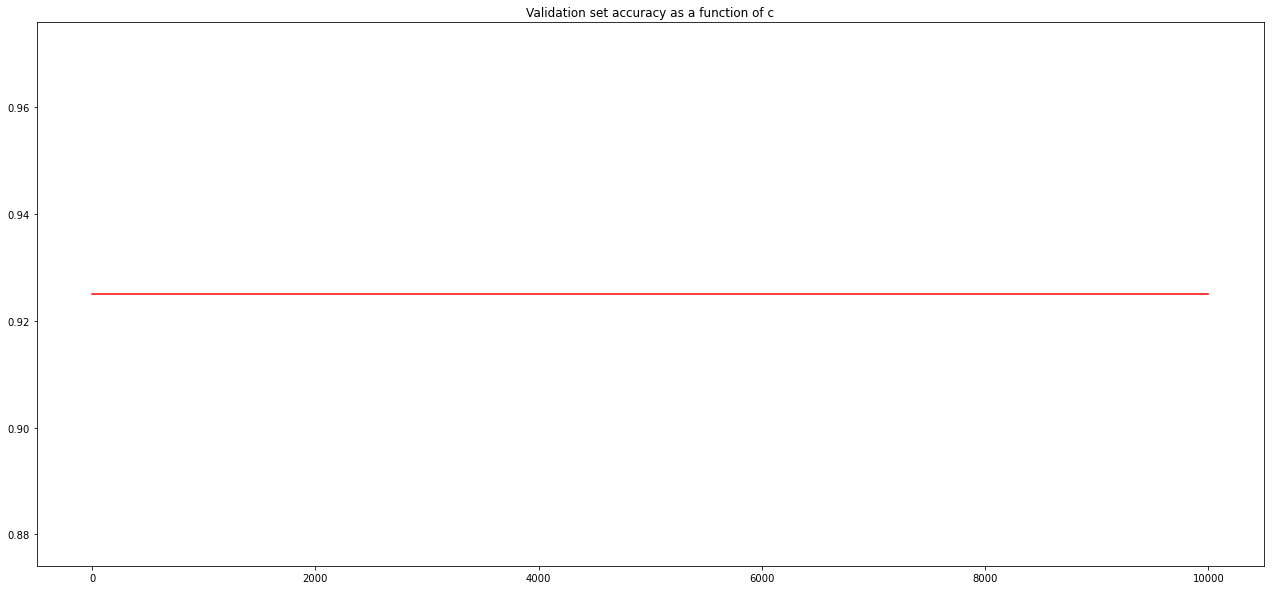

In [12]:
plt.plot(C_range,val_acc,'r-')
plt.title('Validation set accuracy as a function of c')
plt.show()

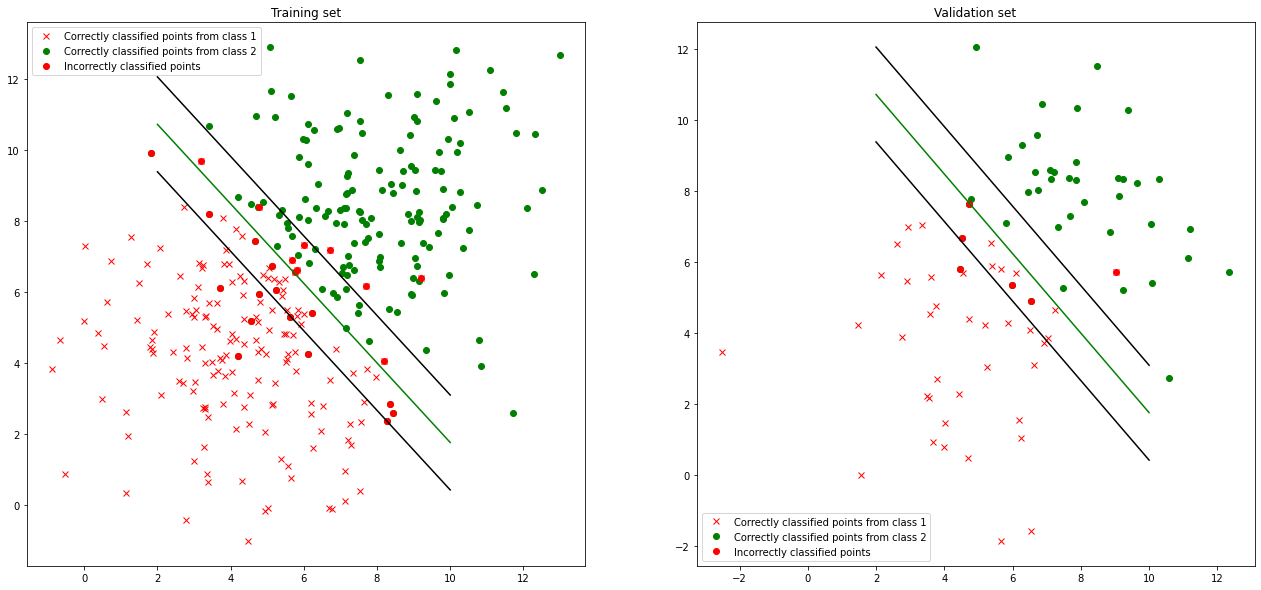

In [13]:
# Plot the result
matplotlib.rcParams['figure.figsize'] = [22,10]
fig,(ax1,ax2) = plt.subplots(1,2)

# Training set
ax1.set_title('Training set')
preds = predict(X_train1,b,w)
ax1.plot(X_train1[y_train1.reshape(-1)==-1,0],X_train1[y_train1.reshape(-1)==-1,1],'rx',label='Correctly classified points from class 1')
ax1.plot(X_train1[y_train1.reshape(-1)==1,0],X_train1[y_train1.reshape(-1)==1,1],'go',label='Correctly classified points from class 2')
ax1.plot(X_train1[preds.reshape(-1) != y_train1.reshape(-1),0],X_train1[preds.reshape(-1) != y_train1.reshape(-1),1],'ro',label='Incorrectly classified points')
# Center line
x11 = 2
x12 = 10
x21 = (-w[0,0]*x11-b)/w[0,1]
x22 = (-w[0,0]*x12-b)/w[0,1]
ax1.plot((x11,x12),(x21,x22),'g-')

# Red margin
x11 = 2
x12 = 10
x21 = (-w[0,0]*x11-b-1)/w[0,1]
x22 = (-w[0,0]*x12-b-1)/w[0,1]
ax1.plot((x11,x12),(x21,x22),'k-')

# Blue margin
x11 = 2
x12 = 10
x21 = (-w[0,0]*x11-b+1)/w[0,1]
x22 = (-w[0,0]*x12-b+1)/w[0,1]
ax1.plot((x11,x12),(x21,x22),'k-')

ax1.legend()

# Training set
ax2.set_title('Validation set')
preds = predict(X_val1,b,w)
ax2.plot(X_val1[y_val1.reshape(-1)==-1,0],X_val1[y_val1.reshape(-1)==-1,1],'rx',label='Correctly classified points from class 1')
ax2.plot(X_val1[y_val1.reshape(-1)==1,0],X_val1[y_val1.reshape(-1)==1,1],'go',label='Correctly classified points from class 2')
ax2.plot(X_val1[preds.reshape(-1) != y_val1.reshape(-1),0],X_val1[preds.reshape(-1) != y_val1.reshape(-1),1],'ro',label='Incorrectly classified points')
# Center line
x11 = 2
x12 = 10
x21 = (-w[0,0]*x11-b)/w[0,1]
x22 = (-w[0,0]*x12-b)/w[0,1]
ax2.plot((x11,x12),(x21,x22),'g-')

# Red margin
x11 = 2
x12 = 10
x21 = (-w[0,0]*x11-b-1)/w[0,1]
x22 = (-w[0,0]*x12-b-1)/w[0,1]
ax2.plot((x11,x12),(x21,x22),'k-')

# Blue margin
x11 = 2
x12 = 10
x21 = (-w[0,0]*x11-b+1)/w[0,1]
x22 = (-w[0,0]*x12-b+1)/w[0,1]
ax2.plot((x11,x12),(x21,x22),'k-')

ax2.legend()

plt.show()

## Question 4 (20 points)

Do the following:
1. Use the SVM code developed in class to fit SVMs with the RBF kernel to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane) and gamma (the basis function width), and plot validation set accuracy as a function of c and gamma.
2. Explain which model is best and why.

In [14]:
def rbf_kernel (X,sigma):
    m = X.shape[0]
    K = np.zeros((m,m))
    for i in range (m):
        for j in range (m):
            K[i,j] = (X[i,:]-X[j,:])@(X[i,:]-X[j,:])
    K = np.exp(-K/(2*sigma**2))
    return K

def set_param(X,y,sigma,C):
    m = X.shape[0]
    Q = (y@y.T)*rbf_kernel(X,sigma)
    c = - np.ones((m,1))
    A = np.concatenate((-np.eye((m)),np.eye((m))),0)
    b = np.concatenate((np.zeros((m,1)),np.ones((m,1))*C),0)
    E = y.T
    d = np.zeros((1,1))
    return Q, c, A, b, E, d

def cvxopt_solvers_qp(Q,c,A=None,b=None,E=None,d=None):
    Q = .5*(Q+Q.T) # make Q is symmetric
    args = [cvxopt.matrix(Q),cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A),cvxopt.matrix(b)])
    if E is not None:
        args.extend([cvxopt.matrix(E),cvxopt.matrix(d)])
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(*args)
    return np.array(sol['x']).reshape(Q.shape[1])

def svms_fit(X,y,sigma,C):
    Q,c,A,b,E,d = set_param(X,y,sigma,C)
    opt_params = cvxopt_solvers_qp(Q,c,A,b,E,d)
    return opt_params 

def find_b (X,y,opt_params,sigma):
    S = np.where(opt_params>1e-5)[0] #[0] make S become a numpy array
    X_s = X[S,:]
    y_s = y[S]
    opt_params_s = opt_params[S].reshape(-1,1)
    b = (y_s - ((opt_params_s*y_s).T*rbf_kernel(X_s,sigma)).sum(axis=1,keepdims=True)).mean()
    #print('Optimal Solution: b=',b)
    return b

def rbf_kernel_(x,xprime,sigma):
    return np.exp(-(x-xprime)@(x-xprime)/(2*sigma**2))

def predict (x,X,y,opt_params,b,sigma):
    results = np.zeros((x.shape[0],1))
    for i in range (x.shape[0]):
        results[i] = 0
        for j in range (X.shape[0]):
            results[i,0] += opt_params[j]*y[j,0]*rbf_kernel_(x[i,:],X[j,:],sigma)
        results[i] += b
    return np.sign(results)

def accuracy(X,y,opt_params,b,sigma):
    preds = predict(X,X,y,opt_params,b,sigma)
    acc = (preds == y).sum()/y.shape[0]
    return acc

In [15]:
C_range = np.logspace(-2, 10, 5)
sigma_range = np.logspace(-9, 3, 5)
val_acc = []
for sigma in tqdm(sigma_range,desc='Progress bar'):
    for C in C_range:
        opt_params = svms_fit(X_train1,y_train1,sigma,C)
        b = find_b(X_train1,y_train1,opt_params,sigma)
        acc = accuracy(X_val1,y_val1,opt_params,b,sigma)
        val_acc.append(acc)  

Progress bar:   0%|          | 0/5 [00:00<?, ?it/s]

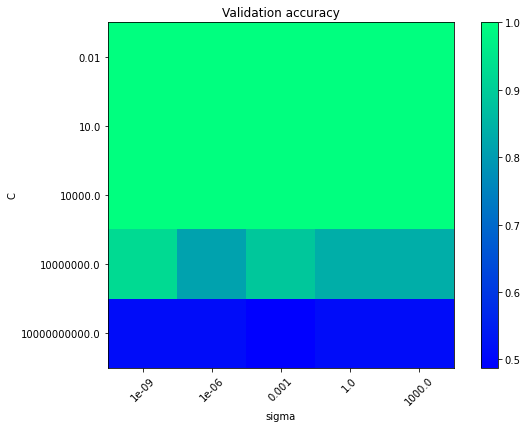

In [16]:
scores = np.array(val_acc)
scores =scores.reshape(len(C_range), len(sigma_range))
scores.shape   
    
# Plot heatmap
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores,interpolation="nearest",cmap=plt.cm.winter)
plt.xlabel("sigma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(sigma_range)), sigma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()

## Question 5 (20 points)

Using the neural network code you developed (based on the code from class) for the deep learning homework assignment, do the following:
1. Fit a two-layer neural network with ReLU activations in the hidden layer and a logistic output layer to the training data from Question 2. Use several different numbers of hidden units in the hidden layer, and plot validation set accuracy as a function of the number of units in the hidden layer.
2. Explain which neural network is best and why, and briefly compare the neural network to the logistic regression and SVM models developed in the previous questions.

In [17]:
# Neural network model

# Activation function
def sigmoid(z):
    results = 1/(1+np.exp(-z))
    return results

def sigmoid_der(z):
    a = sigmoid(z)
    results = a*(1-a)
    return results

def relu(z):
    results = np.where(z>0,z,0)
    return results

def relu_der(z):
    results = np.where(z>0,1,0)
    return results

#Initial parameters
def init_param(n_unit):
    W = {}
    W[1]=np.random.normal(0,0.1,(n_unit,2))
    W[2]=np.random.normal(0,0.1,(1,n_unit))

    b ={}
    b[1]=np.zeros((n_unit,1)) + 0.5
    b[2]=np.zeros((1,1))

    g ={}
    g[1]=relu
    g[2]=sigmoid

    gprime ={}
    gprime[1] =relu_der
    gprime[2] =sigmoid_der
    return W,b,g,gprime

# Forward propagation
def forward(W,b,z,a,g,x):
    L = len(W)
    a[0]=x
    for l in range(1, L+1):
        z[l]=W[l]@a[l-1]+b[l]
        a[l]=g[l](z[l])
        
# Backpropagation        
def backward(W, a, z,delta,y):
    L = len(W)
    dW = {}
    db = {}
    delta[L] = a[L] - y
    for l in range(L,0,-1):
        # Calculate gradient for weights
        dW[l]=delta[l]@a[l-1].T
        # Calculate gradient for biases
        db[l]=delta[l]
        # Calculate previous layer's deltas
        if l>1:
            delta[l-1] = np.diag(gprime[l-1](z[l-1]).reshape(-1))@W[l].T@delta[l]
    return dW,db
def update_weights(W,b,dW,db,alpha):
    L = len(W)
    for l in range(1, L+1):
        W[l] = W[l] - alpha *dW[l]
        b[l] = b[l] - alpha *db[l]
        
# predict function
def predict(W,b,X):
    m = X.shape[0]
    L = len(W)
    a={}
    z={}
    results = np.zeros((m,1))
    for i in range(m):
        x = X[i,:].reshape(-1,1)
        forward(W,b,z,a,g,x)
        results[i] = a[L]
    return np.where(results>0.5,1.0,0.0)

def accuracy(X,y,W,b):
    m = X.shape[0]
    L = len(W)
    a={}
    z={}
    sum = 0
    y_pred = []
    for i in range(m):
        x = X[i,:].reshape(-1,1)
        target = y[i,:].reshape(-1,1)
        forward(W,b,z,a,g,x)
        sum += np.where(a[L]>0.5,1.0,0.0) == target
    return sum[0,0]/m

In [40]:
def model_fit(X,y,W,b,epochs,alpha):
    m = X.shape[0]
    L = len(W)
    a = {}
    z = {}
    delta = {}
    loss_epoch = []
    for epoch in range(epochs):
        
        index = np.arange(m)
        np.random.shuffle(index)
        iter_loss = 0
        for iter in range(m):
            x = X[index[iter],:].reshape(-1,1)
            target = y[index[iter],:].reshape(-1,1)
            forward(W,b,z,a,g,x)
            dW,db =  backward(W, a, z,delta,target)
            update_weights(W,b,dW,db,alpha)
            loss = (- (target*np.log(a[L]) + (1- target)*np.log(1-a[L]))).sum()
            iter_loss += loss
    loss_epoch.append(iter_loss/m)
    return W,b

In [38]:
X_train2 = X_train[:,1:].copy()
y_train2 = y_train.copy()
X_val2 = X_val[:,1:].copy()
y_val2 = y_val.copy()

In [41]:
n_unit_range= np.arange(4,100,8)
val_acc = []
for n_unit in n_unit_range:
    W,b,g,gprime = init_param(n_unit)
    W,b = model_fit(X_train2,y_train2,W,b,epochs=100,alpha=0.001)
    acc = accuracy(X_val2,y_val2,W,b)
    val_acc.append(acc)

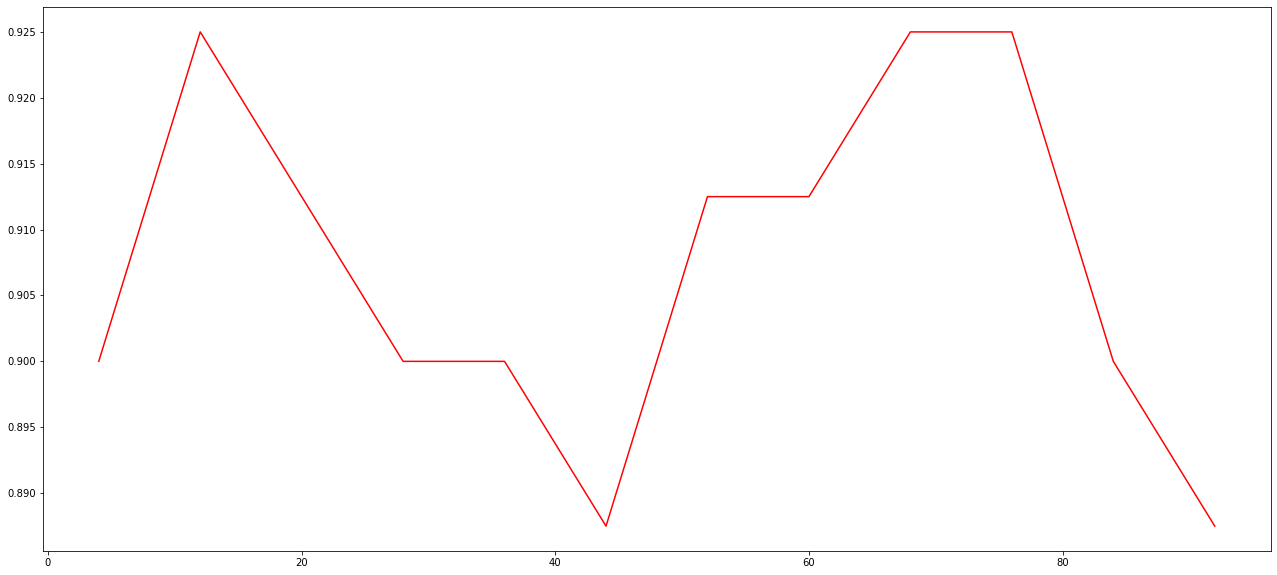

In [42]:
plt.plot(n_unit_range,val_acc,'r-')

In [43]:
print('Training set accuracy:',accuracy(X_train2,y_train2,W,b))

Training set accuracy: 0.8875


## Question 6 (10 points)

Consider what would happen if you got the data from Question 1 *without labels* and were tasked with using unsupervised learning to model and understand the data set. Based on a quick visualization, you see that there seem to be two main clusters in the data and decide to build a $k$-means ($k$=2) or GMM for the dataset.

Obviously, a GMM would be appropriate, as the data were generated from a mixture of Gaussians in the first place. On the other hand, the $k$-means model would be simpler. Would it be as effective?

Do the following:
1. Write the parameters $\phi_1$, $\phi_2$, $\mathbf{\mu}_1$, $\mathbf{\mu}_2$, $\mathtt{\Sigma}_1$, $\mathtt{\Sigma}_2$ of the "ground truth" model used to generate the data in Question 1.
2. Briefly discuss whether, in practice, the $k$-means model would be worse than, equally good, or better than a GMM for this dataset.

final-exam-data.csv
ML-Final-2020.ipynb
ML-Final-2021.ipynb
Sample-Final-Without-Solution.ipynb
